<a href="https://colab.research.google.com/github/nhuyen183/LungCancerSupportSystem/blob/master/BRFSS_LogisticRegression9JANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#@title Import Libraries { vertical-output: true, display-mode: "both" }

import sqlite3
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

!pip install category_encoders
from category_encoders import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
#@title df_structure { display-mode: "both" }

from  glob import glob
filenames = glob('./part*.csv')
appended_data = []  # create a list
for f in filenames:
  df = pd.read_csv(f, index_col=None)
  appended_data.append(df)  # append to the list
df_structure = pd.concat(appended_data, axis=0)
df_structure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211175 entries, 0 to 75640
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   Gender             1211175 non-null  int64
 1   Age65              1211175 non-null  int64
 2   BMI                1211175 non-null  int64
 3   GeneralHealth      1211175 non-null  int64
 4   Smoked100          1211175 non-null  int64
 5   SmokerStatus       1211175 non-null  int64
 6   FirstSmokedAge     1211175 non-null  int64
 7   LastSmokedAge      1211175 non-null  int64
 8   AvgNumCigADay      1211175 non-null  int64
 9   HasCTScan          1211175 non-null  int64
 10  StopSmoking        1211175 non-null  int64
 11  HasAsthma          1211175 non-null  int64
 12  HasChronicDisease  1211175 non-null  int64
 13  HasLungCancer      1211175 non-null  int64
dtypes: int64(14)
memory usage: 138.6 MB


In [111]:
df=df_structure

In [112]:
#@title HasLungCancer { display-mode: "both" }
print (df["HasLungCancer"].value_counts())

0    1210428
1        747
Name: HasLungCancer, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211175 entries, 0 to 75640
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   Gender             1211175 non-null  int64
 1   Age65              1211175 non-null  int64
 2   BMI                1211175 non-null  int64
 3   GeneralHealth      1211175 non-null  int64
 4   Smoked100          1211175 non-null  int64
 5   SmokerStatus       1211175 non-null  int64
 6   FirstSmokedAge     1211175 non-null  int64
 7   LastSmokedAge      1211175 non-null  int64
 8   AvgNumCigADay      1211175 non-null  int64
 9   HasCTScan          1211175 non-null  int64
 10  StopSmoking        1211175 non-null  int64
 11  HasAsthma          1211175 non-null  int64
 12  HasChronicDisease  1211175 non-null  int64
 13  HasLungCancer      1211175 non-null  int64
dtypes: int64(14)
memory usage: 138.6 MB


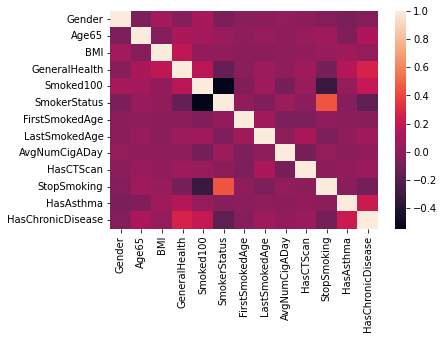

In [14]:
# Create correlation matrix
correlation = df.select_dtypes("number").drop(columns="HasLungCancer").corr()

# Plot heatmap of `correlation`
sns.heatmap(correlation);

In [ ]:
majority_class_prop, minority_class_prop = y.value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

In [113]:
X = df.drop(columns='HasLungCancer').values
y = df['HasLungCancer'].values

from imblearn.over_sampling import SMOTE
# transform the dataset
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1694599, 13)
y_train shape: (1694599,)
X_test shape: (726257, 13)
y_test shape: (726257,)


In [115]:
# Build model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

classifier = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=2000))

# Fit model to training data
history = classifier.fit(X_train, y_train)
print(classifier)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression(max_iter=2000))])


In [116]:
#@title Evaluate the model { display-mode: "both" }
acc_train = accuracy_score(y_train, classifier.predict(X_train))
acc_test = classifier.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.7881
Test Accuracy: 0.7877


In [117]:
#acc_baseline = y_train.value_counts(normalize=True).max()
#print("Baseline Accuracy:", round(acc_baseline, 2))

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 1]
 [1 1]
 ...
 [0 0]
 [1 0]
 [1 1]]


In [118]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
metrics = classification_report(y_test, y_pred)
print(metrics)
print(acc)

[[287801  74928]
 [ 79287 284241]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79    362729
           1       0.79      0.78      0.79    363528

    accuracy                           0.79    726257
   macro avg       0.79      0.79      0.79    726257
weighted avg       0.79      0.79      0.79    726257

0.787657812592512


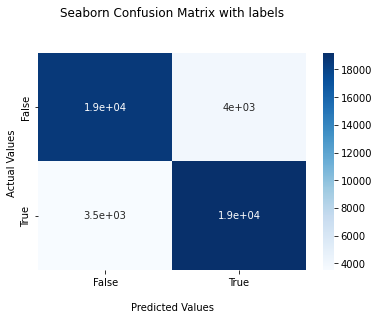

In [48]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [119]:
classifier.named_steps["logisticregression"].intercept_[0]

-2.437075873879961

In [120]:
classifier.named_steps["logisticregression"].coef_[0]

array([-0.69150862,  1.05928149, -1.43314058,  2.94472252,  1.81208021,
        1.24714366, -2.86235414, -0.98776991,  3.14499985,  0.32709557,
       -0.32270737, -0.82729817,  1.42141651])

In [121]:
features = classifier.named_steps["minmaxscaler"].get_feature_names_out(['Gender','Age65','BMI','GeneralHealth','Smoked100','SmokerStatus','FirstSmokedAge','LastSmokedAge','AvgNumCigADay','HasCTScan','StopSmoking','HasAsthma','HasChronicDisease'])
importances = classifier.named_steps["logisticregression"].coef_[0]
print(features, importances)

['Gender' 'Age65' 'BMI' 'GeneralHealth' 'Smoked100' 'SmokerStatus'
 'FirstSmokedAge' 'LastSmokedAge' 'AvgNumCigADay' 'HasCTScan'
 'StopSmoking' 'HasAsthma' 'HasChronicDisease'] [-0.69150862  1.05928149 -1.43314058  2.94472252  1.81208021  1.24714366
 -2.86235414 -0.98776991  3.14499985  0.32709557 -0.32270737 -0.82729817
  1.42141651]


In [122]:
odds_ratios = pd.Series(np.exp(importances),index=features).sort_values()
odds_ratios

FirstSmokedAge        0.057134
BMI                   0.238559
LastSmokedAge         0.372406
HasAsthma             0.437229
Gender                0.500820
StopSmoking           0.724186
HasCTScan             1.386934
Age65                 2.884298
SmokerStatus          3.480388
HasChronicDisease     4.142985
Smoked100             6.123172
GeneralHealth        19.005388
AvgNumCigADay        23.219672
dtype: float64

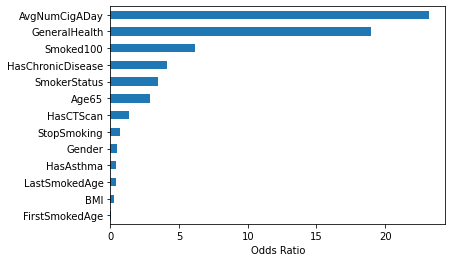

In [123]:
# Horizontal bar chart, five largest coefficients
odds_ratios.plot(kind="barh")
plt.xlabel("Odds Ratio");

In [124]:
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']

loss_val = history.history['val_accuracy']

epochs = range(1,51)

plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.plot(epochs, loss_val, 'b', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

AttributeError: ignored

This chart shows the features that are least likely to be in a building that is severely damaged.

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['train_loss']

loss_val = history.history['val_loss']

epochs = range(1,35)

plt.plot(epochs, loss_train, 'g', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

In [133]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=200, input_dim=13, activation='relu'))
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the ANN

# Compiling the ANN
ann.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy', 'binary_crossentropy'])
print(ann.summary())

# Training the ANN on the Training set
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 100, epochs =10, verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 200)               2800      
                                                                 
 dense_13 (Dense)            (None, 100)               20100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 23,001
Trainable params: 23,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
16946/16946 [==============================] - 48s 3ms/step - loss: 0.4045 - accuracy: 0.8207 - binary_crossentropy: 0.4045 - val_loss: 0.3736 - val_accuracy: 0.8373 - val_binary_crossentropy: 0.3736
Epoch 2/10
16946/16946 [==============================] - 52s 3ms/step - loss: 0.3554 - accuracy: 

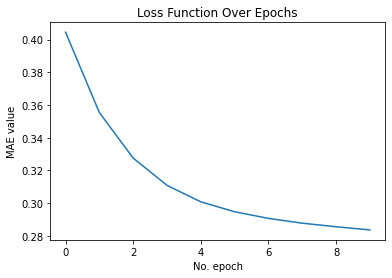

In [134]:
plt.plot(history.history['binary_crossentropy'])
plt.title('Loss Function Over Epochs')
plt.ylabel('loss value')
plt.xlabel('No. epoch')
plt.show()

In [137]:
y_pred = classifier.predict_proba(X_test)

#y_predInverse = sc.inverse_transform(y_pred)
#y_testInverse = sc.inverse_transform(y_test)

In [139]:
def plotGraph(y_test,y_pred,classifier):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(classifier)
    plt.show()
    return

plotGraph(y_test, y_pred, "test")

ValueError: ignored

In [147]:
def buildModel(optimizer):
    # Initialising the ANN
    classifier = Sequential()
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 200, input_dim = 13, activation = 'relu'))
    
    # Adding the second hidden layer
    classifier.add(Dense(units = 100, activation = 'relu'))
    
    # Adding the output layer
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    # Compiling the ANN
    classifier.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['mean_absolute_error', 'binary_crossentropy'])
    
    return classifier

In [ ]:
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

classifier = KerasRegressor(build_fn = buildModel)
#What hyperparameter we want to play with
parameters = {'batch_size': [13, 26, 39, 100, 128],
              'epochs': [50, 60],
              'optimizer': ['adam', 'binary_crossentropy']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)
grid_search = grid_search.fit(X_train, y_train, verbose = 0)

<ipython-input-148-eef258e06780>:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasRegressor(build_fn = buildModel)


26071/26071 [==============================] - 25s 951us/step


In [ ]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']

loss_val = history.history['val_loss']

epochs = range(1,51)

plt.plot(epochs, loss_train, 'g', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

In [ ]:
loss_train = history.history['accuracy']

loss_val = history.history['val_accuracy']

epochs = range(1,51)

plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.plot(epochs, loss_val, 'b', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()